In [1]:
import sys

sys.path.append("../")


from database import *
import polars as pl
import matplotlib.pyplot as plt
from stravalib_wrapper import *

import numpy as np

In [2]:
df = get_spine(root_path="../")

In [3]:
df.tail(10)

Activity ID,Activity Date,Activity Type,Activity Name,Activity Gear,Commute,Elapsed Time,Moving Time,Distance,Average Speed,Elevation Gain,Average Heart Rate,Max Heart Rate,Average Cadence,Filename
i64,"datetime[μs, UTC]",str,str,str,bool,i64,i64,f64,f64,f64,f64,f64,f64,str
17041236713,2026-01-13 22:01:49 UTC,"""Ride""","""Will riding up a hill really h…","""Kreissäge""",false,7279,6162,49.2306,7.989,575.0,155.4,184.0,80.9,"""fit_files/api_series_pulls/170…"
17074276919,2026-01-16 20:01:01 UTC,"""Ride""","""Frozen""","""Kreissäge""",false,8814,8492,64.6008,7.607,340.0,149.5,171.0,77.4,"""fit_files/api_series_pulls/170…"
17098068527,2026-01-18 20:37:42 UTC,"""Ride""","""Picket Guard +2""","""Pink Bridgestone""",false,3839,3839,33.1643,8.639,0.0,154.4,181.0,86.0,"""fit_files/api_series_pulls/170…"
17104015717,2026-01-19 13:08:02 UTC,"""Ride""","""Glassy +1""","""Pink Bridgestone""",false,5400,5400,47.3064,8.76,0.0,149.8,170.0,88.7,"""fit_files/api_series_pulls/171…"
17108197044,2026-01-19 19:18:10 UTC,"""Ride""","""Just an excuse to get out of t…","""Salsa Fargo""",false,5572,4549,19.2096,4.223,322.0,143.1,165.0,69.4,"""fit_files/api_series_pulls/171…"
17132547340,2026-01-21 21:58:46 UTC,"""Ride""","""Commute: Afternoon Ride""","""Salsa Fargo""",true,870,763,4.5073,5.907,38.0,143.6,172.0,76.6,"""fit_files/api_series_pulls/171…"
17133942647,2026-01-21 23:59:29 UTC,"""Ride""","""Post climb extra long commute""","""Salsa Fargo""",true,2975,2808,18.1873,6.477,133.0,155.4,173.0,79.9,"""fit_files/api_series_pulls/171…"
17155271852,2026-01-23 23:03:06 UTC,"""Ride""","""Antelope +2""","""Pink Bridgestone""",false,5400,5400,47.4212,8.782,0.0,156.9,177.0,82.3,"""fit_files/api_series_pulls/171…"
17177951856,2026-01-25 21:56:54 UTC,"""Ride""","""Bounty""","""Pink Bridgestone""",false,7200,7200,60.184,8.359,0.0,148.1,182.0,81.0,"""fit_files/api_series_pulls/171…"


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 124.,   8.,  11.,
         69.,   4.,   5.,   8.,  53.,  11.,   6.,  20.,  39.,  20.,  25.,
         27.,  14.,  14.,  55.,  12.,  18.,  31.,   5.,   8.,  12.,  10.,
          5.,   6.,  26.,  13.,   8.,   6.,   7.,   5.,   9.,   5.,   4.,
          7.,   3.,  13.,  11.,   9.,  18.,   6.,  14.,  18.,   5.,  10.,
         23.,  21.,  14.,  18.,  12.,   8.,  18.,   7.,  15.,  13.,  10.,
          7.,   4.,   4.,   8.,  12.,   5.,   6.,  10.,   2.,   2.,   3.,
          2.,   4.,   4.,   0.,   3.,   6.,   2.,   0.,   0.,   1.,   0.,
          1.]),
 array([0.        , 0.02479302, 0.04958603, 0.07437905, 0.09917207,
        0.12396509, 0.1487581 , 0.17355112, 0.19834414, 0.22313715,
        0.24793017, 0.27272319, 0.29751621, 0.32230922, 0.34710224,
        0.37189526, 0.39668828, 0.42148129, 0.44627431, 0.47106733,
        0.49586034, 0.52065336, 0.54544638, 0.

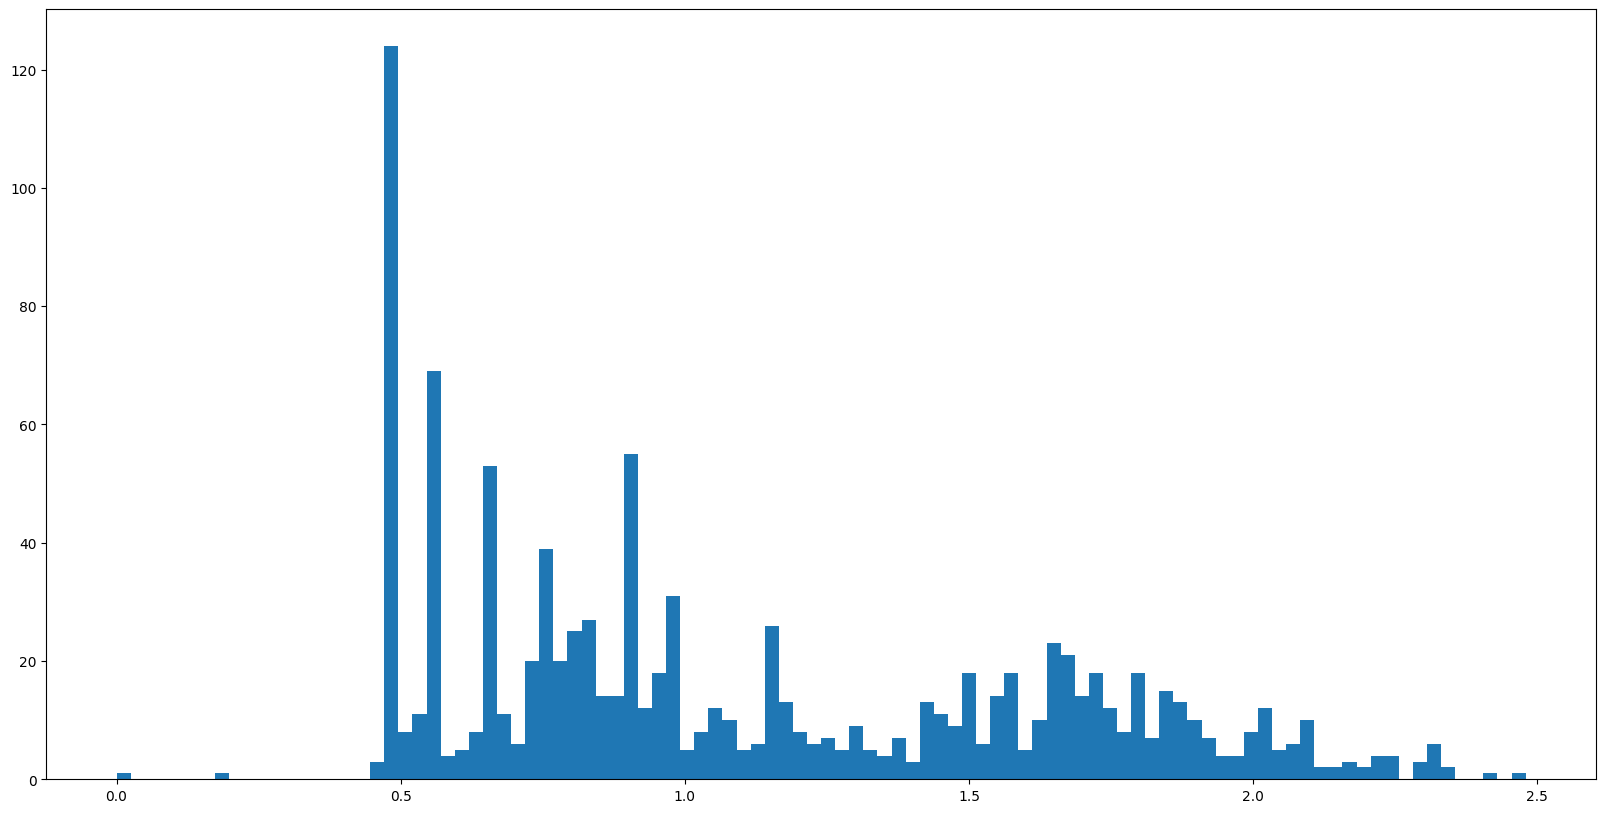

In [5]:
plt.figure(figsize=(20, 10))

plt.hist(
    np.log(df["Distance"] + 1) / np.log(10),
    bins=100
)

In [8]:
10**2.5

316.22776601683796

In [9]:
df.sample(10)

Activity ID,Activity Date,Activity Type,Activity Name,Activity Gear,Commute,Elapsed Time,Moving Time,Distance,Average Speed,Elevation Gain,Average Heart Rate,Max Heart Rate,Average Cadence,Filename
i64,"datetime[μs, UTC]",str,str,str,bool,i64,i64,f64,f64,f64,f64,f64,f64,str
16165055255,2025-10-16 20:59:11 UTC,"""Ride""","""Afternoon Ride""","""Salsa Fargo""",true,9168,2083,13.09,6.288,141.0,144.0,169.0,77.0,"""fit_files/activities/172486608…"
14815747091,2025-06-16 11:19:28 UTC,"""Ride""","""Commute: Morning Ride""","""Singlespeed beater""",true,408,356,2.08,5.842,18.0,122.0,153.0,null,"""fit_files/activities/158119382…"
16699713661,2025-12-09 22:36:26 UTC,"""Ride""","""Poker and hang 2""","""Bianchi Volpe""",true,12636,4129,26.35,6.382,194.0,149.0,181.0,null,"""fit_files/activities/177894737…"
8404144040,2023-01-17 00:36:42 UTC,"""Virtual Ride""","""Zwift - Two Bridges Loop in Wa…","""Trek Domane Al""",false,1244,1146,8.98,7.843,111.0,147.0,173.0,83.0,"""fit_files/activities/901503697…"
15402732919,2025-08-09 11:51:11 UTC,"""Ride""","""UnPAved training with the gang""","""Bianchi Volpe""",false,26469,18087,129.42,7.156,1341.0,151.0,180.0,85.0,"""fit_files/activities/164489381…"
14183291545,2025-04-15 11:27:47 UTC,"""Ride""","""Commute: Morning Ride""","""Bianchi Volpe""",true,448,427,2.57,6.037,38.0,143.0,167.0,null,"""fit_files/activities/151375763…"
16050867974,2025-10-06 11:43:11 UTC,"""Ride""","""Commute: Morning Ride""","""Bianchi Volpe""",true,421,325,2.06,6.344,12.0,123.0,151.0,null,"""fit_files/activities/171333393…"
13856132586,2025-03-11 21:03:35 UTC,"""Ride""","""Commute: Afternoon Ride""","""Salsa Fargo""",true,529,411,2.19,5.328,52.0,158.0,171.0,null,"""fit_files/activities/147895298…"
14359019627,2025-05-02 21:01:47 UTC,"""Ride""","""Week end, brain off ride""","""Lauf Seigla""",false,9257,8635,70.78,8.197,289.0,156.0,171.0,85.0,"""fit_files/activities/153213567…"
